# Comparing Trump and Clinton’s Facebook pages during the US presidential election, 2016

## Source https://datascienceplus.com/comparing-trump-and-clintons-facebook-pages-during-the-us-presidential-election-2016/

The first thing to do is to generate an access token from Facebook’s developer portal. 
https://developers.facebook.com/tools/explorer
Keep it anonymous (otherwise you’re gifting the world access to your account) 
and save it in your environment.


In [57]:
#install.packages('Rfacebook')

library(Rfacebook)
options(scipen = 999)
token <- "EAACEdEose0cBAFrM5wLOBD7Bn93Ajo0eutn5OYqZCHMoejnnRro2UKnJ8U7PxvtPSu6xgWv5LULBZBYR1AUhuq4ftHcTb5B6YNJXNnTSdlbw6vEiBR4HS7H6Wotoo7nJq9PO3vgeAs1bpS1bedZBalYFRTuYzFFDp6cqbiKVCasZAayXLzqkiYC8BmyiAaefp85maUUMGgZDZD"



In [58]:
trump <- getPage("donaldtrump", token, n = 5000, since='2016/01/01', until='2016/11/09')
clinton <- getPage("hillaryclinton", token, n = 5000, since='2016/01/01', until='2016/11/09')



25 posts 50 posts 75 posts 100 posts 125 posts 150 posts 175 posts 200 posts 225 posts 250 posts 275 posts 300 posts 325 posts 350 posts 375 posts 400 posts 425 posts 450 posts 475 posts 500 posts 525 posts 545 posts 24 posts 49 posts 74 posts 99 posts 124 posts 149 posts 174 posts 199 posts 224 posts 249 posts 274 posts 299 posts 324 posts 349 posts 374 posts 399 posts 424 posts 449 posts 474 posts 499 posts 524 posts 549 posts 574 posts 599 posts 624 posts 649 posts 674 posts 683 posts 

In [47]:
Parthenope <- getPage("Parthenope", token, n = 5000, since='2016/10/01', until='2017/09/01')


25 posts 50 posts 75 posts 100 posts 125 posts 150 posts 175 posts 200 posts 225 posts 250 posts 275 posts 300 posts 325 posts 332 posts 

In [59]:
aeroportona <- getPage("aeroportonapoli", token, n = 5000, since='2016/10/01', until='2017/09/01')


25 posts 50 posts 75 posts 100 posts 125 posts 150 posts 175 posts 200 posts 225 posts 250 posts 261 posts 

In [62]:
aeroportove <- getPage("veniceairport", token, n = 5000, since='2016/10/01', until='2017/09/01')


25 posts 50 posts 75 posts 100 posts 125 posts 150 posts 175 posts 200 posts 225 posts 250 posts 275 posts 300 posts 325 posts 343 posts 

In [63]:
#aeroportona

In [48]:
#unina.it
unina <- getPage("unina.it", token, n = 5000, since='2016/10/01', until='2017/09/01')


25 posts 50 posts 75 posts 100 posts 125 posts 150 posts 175 posts 200 posts 225 posts 250 posts 275 posts 300 posts 325 posts 350 posts 375 posts 400 posts 425 posts 450 posts 475 posts 500 posts 525 posts 550 posts 575 posts 600 posts 609 posts 

In [39]:
format.facebook.date <- function(datestring) {
  date <- as.POSIXct(datestring, format = "%Y-%m-%dT%H:%M:%S+0000", tz = "GMT")
}

aggregate.metric <- function(metric) {
  m <- aggregate(page[[paste0(metric, "_count")]], list(month = page$month),
                 mean)
  m$month <- as.Date(paste0(m$month, "-15"))
  m$metric <- metric
  return(m)
}


In [64]:
#aeroportona
page <- aeroportona
page$datetime <- format.facebook.date(page$created_time)
page$month <- format(page$datetime, "%Y-%m")
df.list <- lapply(c("likes", "comments", "shares"), aggregate.metric)
aeroportona_months  <- do.call(rbind, df.list)


#aeroportove
page <- aeroportove
page$datetime <- format.facebook.date(page$created_time)
page$month <- format(page$datetime, "%Y-%m")
df.list <- lapply(c("likes", "comments", "shares"), aggregate.metric)
aeroportove_months  <- do.call(rbind, df.list)



In [21]:
#trump
page <- trump
page$datetime <- format.facebook.date(page$created_time)
page$month <- format(page$datetime, "%Y-%m")
df.list <- lapply(c("likes", "comments", "shares"), aggregate.metric)
trump_months  <- do.call(rbind, df.list)


#clinton
page <- clinton
page$datetime <- format.facebook.date(page$created_time)
page$month <- format(page$datetime, "%Y-%m")
df.list <- lapply(c("likes", "comments", "shares"), aggregate.metric)
clinton_months <- do.call(rbind, df.list)




# Comparing Partenope and Federico II’s Facebook pages last years
# Any conclusion?

In [49]:
#parthenope
page <- Parthenope
page$datetime <- format.facebook.date(page$created_time)
page$month <- format(page$datetime, "%Y-%m")
df.list <- lapply(c("likes", "comments", "shares"), aggregate.metric)
Parthenope_months <- do.call(rbind, df.list)

#unina
page <- unina
page$datetime <- format.facebook.date(page$created_time)
page$month <- format(page$datetime, "%Y-%m")
df.list <- lapply(c("likes", "comments", "shares"), aggregate.metric)
unina_months <- do.call(rbind, df.list)



In [31]:
#clinton_months

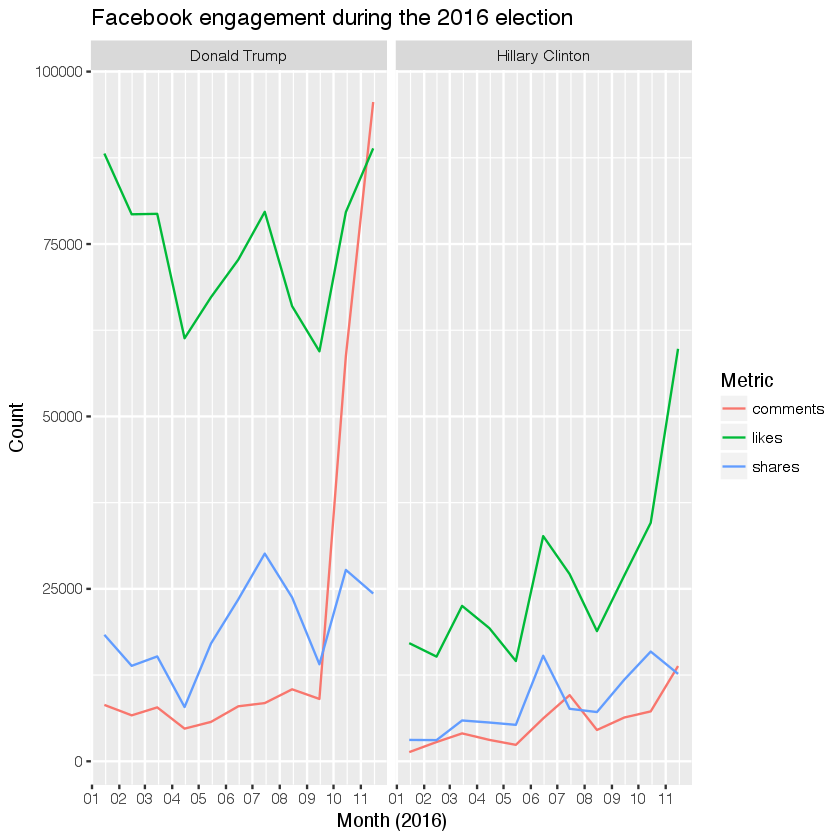

In [7]:
trump_months$candidate <- "Donald Trump"
clinton_months$candidate <- "Hillary Clinton"
both <- rbind(trump_months, clinton_months)

library(ggplot2)
#install.packages('scales')
library(scales)

p <- ggplot(both, aes(x = month, y = x, group = metric)) + geom_line(aes(color = metric)) +
  scale_x_date(date_breaks = "months", labels = date_format("%m")) + ggtitle("Facebook engagement during the 2016 election") + labs(y = "Count", x = "Month (2016)", aesthetic='Metric')  + scale_colour_discrete(name = "Metric")

#add in a facet
p <- p + facet_grid(. ~ candidate)
p


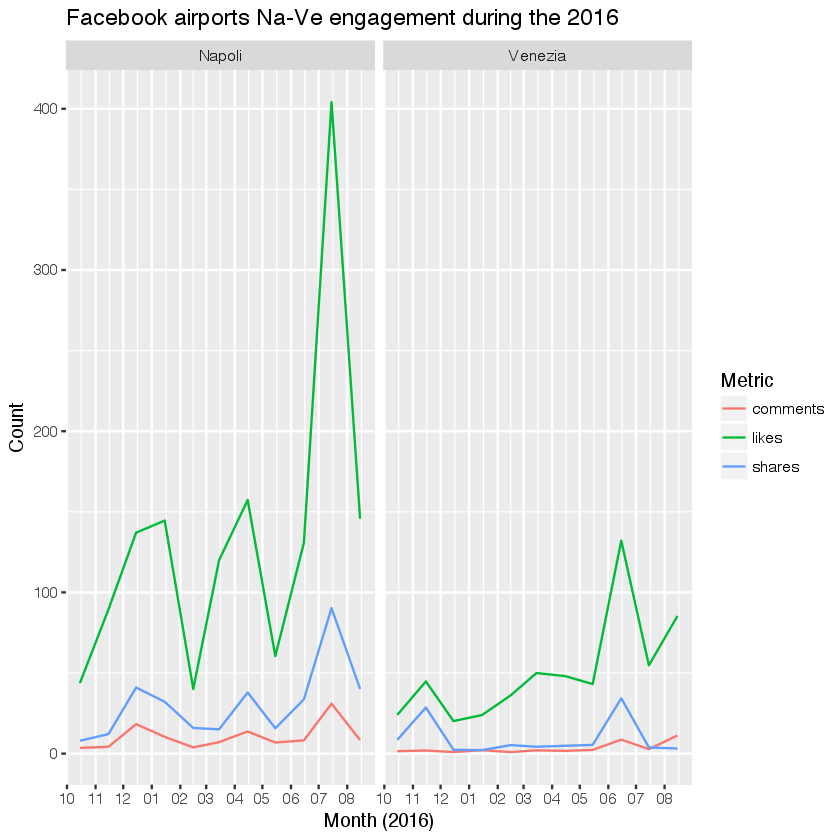

In [65]:
aeroportona_months$aeroporto <- "Napoli"
aeroportove_months$aeroporto <- "Venezia"
both <- rbind(aeroportona_months, aeroportove_months)

library(ggplot2)
#install.packages('scales')
library(scales)

p <- ggplot(both, aes(x = month, y = x, group = metric)) + geom_line(aes(color = metric)) +
  scale_x_date(date_breaks = "months", labels = date_format("%m")) + ggtitle("Facebook airports Na-Ve engagement during the 2016") + labs(y = "Count", x = "Month (2016)", aesthetic='Metric')  + scale_colour_discrete(name = "Metric")

#add in a facet
p <- p + facet_grid(. ~ aeroporto)
p


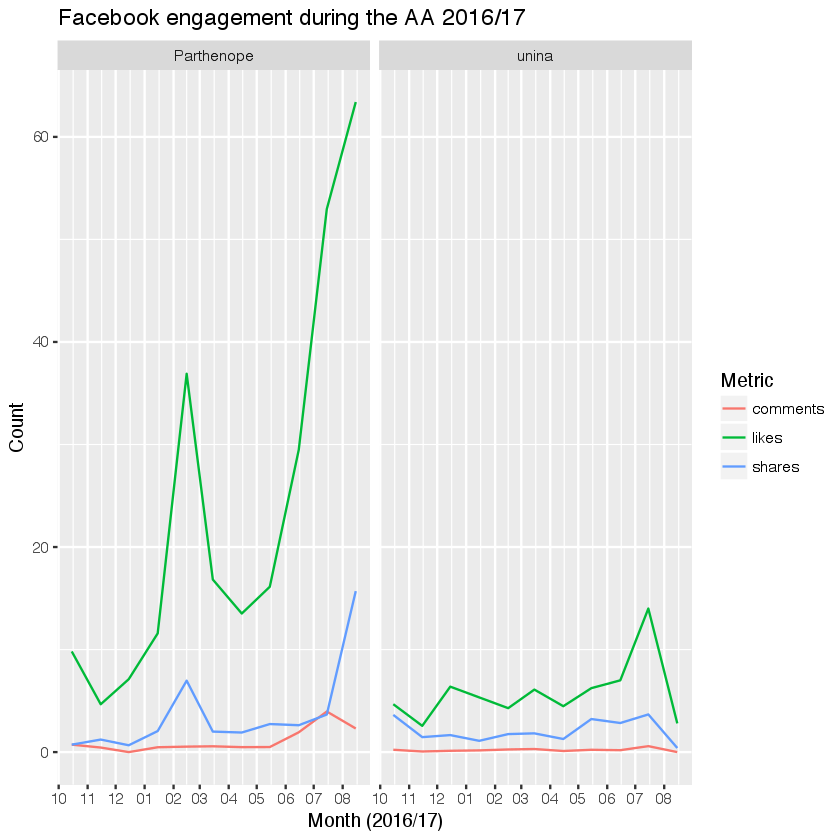

In [50]:
unina_months$university <- "unina"
Parthenope_months$university <- "Parthenope"
both <- rbind(unina_months, Parthenope_months)

library(ggplot2)
#install.packages('scales')
library(scales)

p <- ggplot(both, aes(x = month, y = x, group = metric)) + geom_line(aes(color = metric)) +
  scale_x_date(date_breaks = "months", labels = date_format("%m")) + ggtitle("Facebook engagement during the AA 2016/17") + labs(y = "Count", x = "Month (2016/17)", aesthetic='Metric')  + scale_colour_discrete(name = "Metric")

#add in a facet
p <- p + facet_grid(. ~ university)
p

15 posts 25 posts 50 posts 75 posts 100 posts 125 posts 150 posts 175 posts 200 posts 225 posts 250 posts 275 posts 300 posts 325 posts 350 posts 375 posts 400 posts 425 posts 450 posts 475 posts 500 posts 525 posts 550 posts 575 posts 600 posts 617 posts 

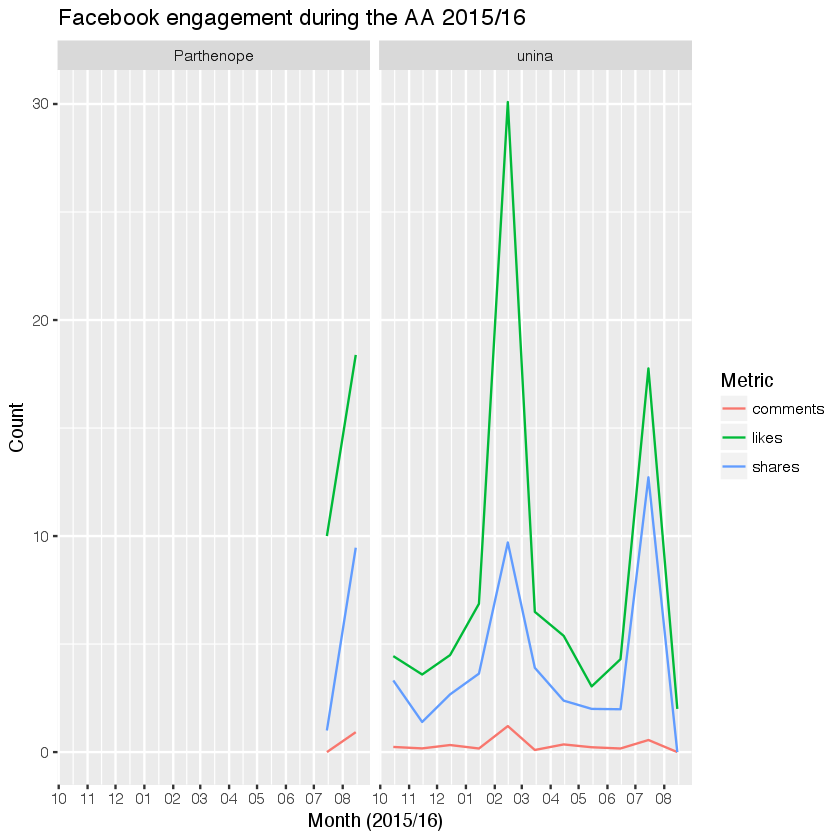

In [52]:
Parthenope <- getPage("Parthenope", token, n = 5000, since='2015/10/01', until='2016/09/01')
unina <- getPage("unina.it", token, n = 5000, since='2015/10/01', until='2016/09/01')


#parthenope
page <- Parthenope
page$datetime <- format.facebook.date(page$created_time)
page$month <- format(page$datetime, "%Y-%m")
df.list <- lapply(c("likes", "comments", "shares"), aggregate.metric)
Parthenope_months <- do.call(rbind, df.list)

#unina
page <- unina
page$datetime <- format.facebook.date(page$created_time)
page$month <- format(page$datetime, "%Y-%m")
df.list <- lapply(c("likes", "comments", "shares"), aggregate.metric)
unina_months <- do.call(rbind, df.list)

unina_months$university <- "unina"
Parthenope_months$university <- "Parthenope"
both <- rbind(unina_months, Parthenope_months)

library(ggplot2)
#install.packages('scales')
library(scales)

p <- ggplot(both, aes(x = month, y = x, group = metric)) + geom_line(aes(color = metric)) +
  scale_x_date(date_breaks = "months", labels = date_format("%m")) + ggtitle("Facebook engagement during the AA 2015/16") + labs(y = "Count", x = "Month (2015/16)", aesthetic='Metric')  + scale_colour_discrete(name = "Metric")

#add in a facet
p <- p + facet_grid(. ~ university)
p

In [53]:
both


month,x,metric,university
2015-10-15,4.44318182,likes,unina
2015-11-15,3.59210526,likes,unina
2015-12-15,4.49090909,likes,unina
2016-01-15,6.86666667,likes,unina
2016-02-15,30.09090909,likes,unina
2016-03-15,6.49180328,likes,unina
2016-04-15,5.38157895,likes,unina
2016-05-15,3.04081633,likes,unina
2016-06-15,4.30000000,likes,unina
2016-07-15,17.76000000,likes,unina


25 posts 50 posts 75 posts 100 posts 125 posts 150 posts 175 posts 200 posts 225 posts 250 posts 275 posts 300 posts 325 posts 350 posts 375 posts 400 posts 425 posts 450 posts 475 posts 500 posts 525 posts 550 posts 575 posts 584 posts 25 posts 50 posts 75 posts 100 posts 125 posts 150 posts 175 posts 200 posts 225 posts 250 posts 275 posts 300 posts 325 posts 350 posts 375 posts 400 posts 425 posts 450 posts 475 posts 500 posts 525 posts 550 posts 575 posts 600 posts 625 posts 650 posts 675 posts 700 posts 725 posts 750 posts 775 posts 800 posts 825 posts 850 posts 875 posts 900 posts 925 posts 950 posts 975 posts 1000 posts 1025 posts 1050 posts 1075 posts 1100 posts 1125 posts 1150 posts 1175 posts 1200 posts 1225 posts 1250 posts 1275 posts 1300 posts 1325 posts 1350 posts 1375 posts 1400 posts 1425 posts 1450 posts 1475 posts 1500 posts 1525 posts 1550 posts 1570 posts 

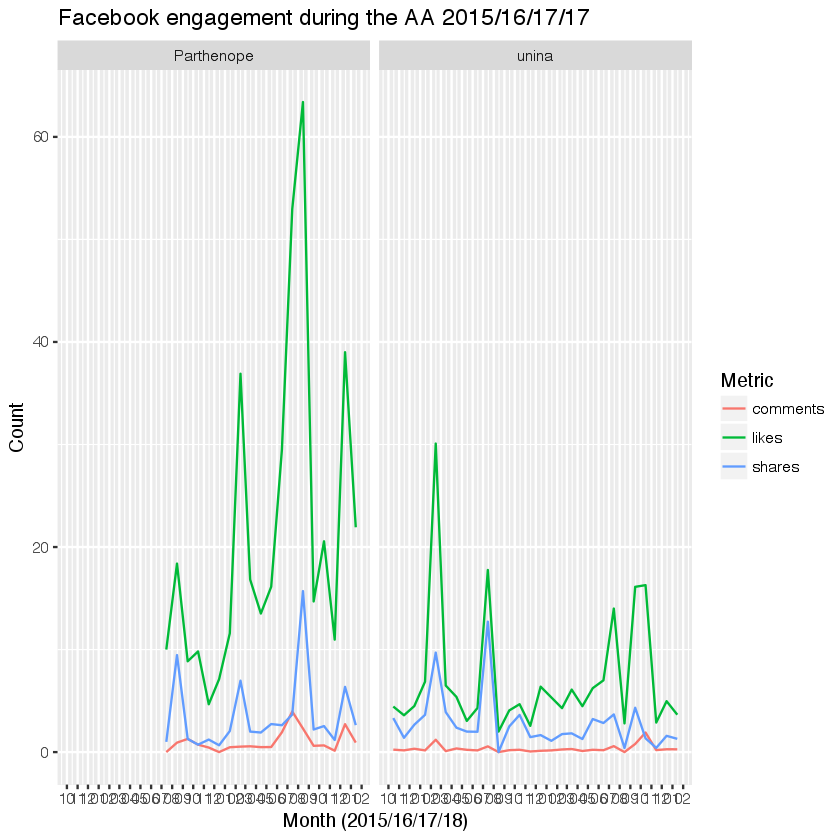

In [54]:
Parthenope <- getPage("Parthenope", token, n = 5000, since='2015/10/01', until='2018/02/01')
unina <- getPage("unina.it", token, n = 5000, since='2015/10/01', until='2018/02/01')


#parthenope
page <- Parthenope
page$datetime <- format.facebook.date(page$created_time)
page$month <- format(page$datetime, "%Y-%m")
df.list <- lapply(c("likes", "comments", "shares"), aggregate.metric)
Parthenope_months <- do.call(rbind, df.list)

#unina
page <- unina
page$datetime <- format.facebook.date(page$created_time)
page$month <- format(page$datetime, "%Y-%m")
df.list <- lapply(c("likes", "comments", "shares"), aggregate.metric)
unina_months <- do.call(rbind, df.list)

unina_months$university <- "unina"
Parthenope_months$university <- "Parthenope"
both <- rbind(unina_months, Parthenope_months)

library(ggplot2)
#install.packages('scales')
library(scales)

p <- ggplot(both, aes(x = month, y = x, group = metric)) + geom_line(aes(color = metric)) +
  scale_x_date(date_breaks = "months", labels = date_format("%m")) + ggtitle("Facebook engagement during the AA 2015/16/17/17") + labs(y = "Count", x = "Month (2015/16/17/18)", aesthetic='Metric')  + scale_colour_discrete(name = "Metric")

#add in a facet
p <- p + facet_grid(. ~ university)
p